<a href="https://colab.research.google.com/github/Rafa2016831028/Artificial-Intelligence/blob/main/PCA_OFD_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import os

from google.colab import files
uploaded = files.upload()

Saving OFD.csv to OFD.csv


In [2]:
data= pd.read_csv('OFD.csv')
data =data.rename(columns={"1. Where do you live during the Pandemic?": "LIVING_AREA",
                     "2. Currently, are you living with?": "LIVING_STATUS",
                     "3. What is your age (choose the best match range)?":"AGE",
                     "4. Your Gender?":"GENDER",
                     "4. Your Profession?":"PROFESSION",
                     "5. What is your current salary range? (monthly)":"SALARY_RANGE",
                     "6. Does the Covid-19 pandemic affect your financial condition?":"FINANCIAL_CONDITION_AFFECT",
                     "7. How frequently you order food online?":"ORDER_FREQUENCY",
                     "8. Did you order food online during the Covid-19 pandemic?":"ORDER_DURING_PENDAMIC",
                     "9. Do you feel safe using OFD (Online Food Ordering) during the Covid-19  pandemic?":"SAFE_FEEL",
                     "11. Do you think the restaurant food quality is maintained when you order online during the Covid-19 pandemic?":"Perspective_On_Quality",
                     "12. Do you prefer third-party apps (For example FoodPanda / PathaoFood ) more than a restaurant's website to order food online?":"SYSTEM_PREFERENCE",
                     "13. Which apps did you use so far for online food ordering?":"USED_OFD",
                     "14. Your preferred payment method for OFD (Online Food Delivery)?":"PAYMENT_METHOD",
                     "15. Do you think the restaurant rating system in OFD help to order good quality food?  ":"RATING_HELP",
                     "16. What do you think OFD (Online Food Delivery) should improve during a pandemic?":"IMPROVE",
                     "17. Do you feel OFD ensures timeliness?":"timeliness",
                     "18. Do you think OFD provides food less cost then restaurants?":"LESS_COST",
                     "19. When is the best time to use OFD (Online Food Delivery) for you?":"PREFERED_TIME",
                     "20. Did you face any issue describing your address to the delivery man while using (Online Food Delivery) during the pandemic?":"DELIVERY_ISSUE",
                     "21. What encourages you most to use OFD (Online Food Delivery) during a pandemic? ":"ENCOURAGEMENT",
                     "22. What safety measure you notice OFD providers take to ensure safety for the Covid-19  pandemic?":"NOTICED_SAFETY_MEASURE",
                     "23. Did you notice any difference in OFD (Online Food Delivery) before and after the pandemic?":"DIFFERENCE",
                     "24. If yes what's the difference?":"OBSERVED_DIFFERENCE",
                     "25. Did you face any issues using OFD  during the pandemic?":"FACED_ISSUE",
                     "26. Did OFD (Online Food Delivery) owners take any steps to solve the issues you have faced?":"SOLVED_ISSUE"
 })
data.drop('27. Any Comments?',axis=1,inplace=True)
data.drop('USED_OFD',axis=1,inplace=True)
data.drop('PROFESSION',axis=1,inplace=True)
data.drop('Timestamp',axis=1, inplace=True)
data.drop('IMPROVE',axis=1, inplace=True)
data.drop('10. If yes or no, please share the reason?',axis=1, inplace=True)
data.head()
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

cleanData = pd.DataFrame({
    'AR': lb_make.fit_transform(data['LIVING_AREA']),
    'LS': lb_make.fit_transform(data['LIVING_STATUS']),
    'AGE': lb_make.fit_transform(data['AGE']),
    'GEN': lb_make.fit_transform(data['GENDER']),
   # 'PROFESSION': lb_make.fit_transform(data['PROFESSION'].astype(str)),
    'S': lb_make.fit_transform(data['SALARY_RANGE']),
    'CFE': lb_make.fit_transform(data['FINANCIAL_CONDITION_AFFECT']),
    'OF':lb_make.fit_transform(data['ORDER_FREQUENCY']),
    'ORD': lb_make.fit_transform(data['ORDER_DURING_PENDAMIC']),
    'SF':lb_make.fit_transform(data['SAFE_FEEL']),
    'POQ':lb_make.fit_transform(data['Perspective_On_Quality']),
    'SP':lb_make.fit_transform(data['SYSTEM_PREFERENCE']),
  #  'USED':lb_make.fit_transform(data['USED_OFD']),
    'PAY':lb_make.fit_transform(data['PAYMENT_METHOD']),
    'RH':lb_make.fit_transform(data['RATING_HELP'].astype(str)),
    'time':lb_make.fit_transform(data['timeliness'].astype(str)),
    'LC':lb_make.fit_transform(data['LESS_COST'].astype(str)),
    'PT': lb_make.fit_transform(data['PREFERED_TIME']),
    'DI': lb_make.fit_transform(data['DELIVERY_ISSUE']),
   # 'ENCOURAGEMENT': lb_make.fit_transform(data['ENCOURAGEMENT'].astype(str)),
    'NSM': lb_make.fit_transform(data['NOTICED_SAFETY_MEASURE']),

})
cleanData.columns =cleanData.columns.str.upper()
cleanData.head(20)

,AR,LS,AGE,GEN,S,CFE,OF,ORD,SF,POQ,SP,PAY,RH,TIME,LC,PT,DI,NSM
0,2,1,2,1,0,0,2,3,1,0,0,0,1,1,0,3,0,21
1,2,1,2,0,0,1,3,1,2,1,2,3,0,3,2,0,1,15
2,2,1,3,1,3,0,3,3,1,0,2,2,1,2,0,1,1,2
3,2,1,1,1,0,2,4,1,1,1,2,0,2,1,1,1,1,8
4,2,1,2,1,0,0,3,2,0,1,0,0,0,1,0,0,0,16
5,2,1,2,1,1,2,4,1,2,2,2,0,2,2,0,3,0,2
6,2,1,1,1,0,0,3,0,1,2,2,0,0,1,0,1,0,2
7,2,1,2,1,0,2,3,0,1,1,1,0,0,0,0,0,0,2
8,2,0,2,1,1,1,3,0,1,1,2,1,2,2,0,1,0,0
9,2,1,2,1,0,2,2,3,0,0,1,0,1,1,1,1,0,22


In [5]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaledData = StandardScaler().fit_transform(cleanData) # normalizing the data 
scaledData = pd.DataFrame(scaledData)
scaledData

# # fit scaler on training data
# norm = MinMaxScaler().fit(cleanData)
# # transform training data
# X_train_norm = norm.transform(cleanData)
# X_train_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.634811,0.452911,0.351099,0.586632,-1.535818,-1.457551,-0.573342,1.194610,-0.381255,-1.765944,-2.812173,-0.464656,-0.285640,-0.60072,-1.155934,1.293282,-0.951528,0.890972
1,0.634811,0.452911,0.351099,-1.590082,-1.535818,-0.255711,0.345308,-0.752673,0.997129,-0.256865,0.606072,3.315144,-1.318336,2.00548,2.103800,-1.401587,1.050941,0.209451
2,0.634811,0.452911,1.529788,0.586632,0.000000,-1.457551,0.345308,1.194610,-0.381255,-1.765944,0.606072,2.055210,-0.285640,0.70238,-1.155934,-0.503297,1.050941,-1.267178
3,0.634811,0.452911,-0.827590,0.586632,-1.535818,0.946130,1.263958,-0.752673,-0.381255,-0.256865,0.606072,-0.464656,0.747057,-0.60072,0.473933,-0.503297,1.050941,-0.585657
4,0.634811,0.452911,0.351099,0.586632,-1.535818,-1.457551,0.345308,0.220968,-1.759639,-0.256865,-2.812173,-0.464656,-1.318336,-0.60072,-1.155934,-1.401587,-0.951528,0.323038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,-1.022751,0.452911,-0.827590,-1.590082,0.511939,0.946130,-0.573342,1.194610,0.997129,1.252215,0.606072,-0.464656,0.747057,0.70238,0.473933,-0.503297,1.050941,1.004559
137,0.634811,0.452911,0.351099,-1.590082,0.511939,-1.457551,1.263958,-1.726315,-0.381255,-0.256865,0.606072,-0.464656,1.779754,2.00548,2.103800,1.293282,-0.951528,1.004559
138,-1.022751,0.452911,1.529788,0.586632,1.023878,0.946130,0.345308,0.220968,-0.381255,-0.256865,0.606072,-0.464656,1.779754,2.00548,2.103800,0.394993,-0.951528,0.209451
139,-1.022751,0.452911,-0.827590,0.586632,0.511939,0.946130,0.345308,1.194610,-1.759639,-0.256865,0.606072,-0.464656,-1.318336,-0.60072,0.473933,-1.401587,-0.951528,-1.494351


([<matplotlib.axis.XTick at 0x7fc090c69c88>,
 <a list of 3 Text major ticklabel objects>)

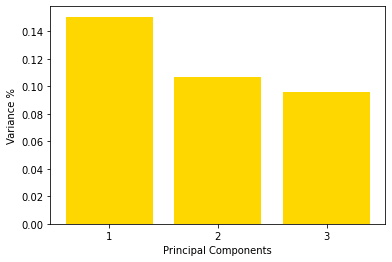

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaledData)

# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)



            0         1         2
0   -2.427593  2.117178  2.353759
1    2.598665 -0.112841  1.201942
2   -0.115427  1.539944  0.441612
3    0.648189  0.521110 -1.218332
4   -2.554372  2.580147  1.158002
..        ...       ...       ...
136  0.771380 -2.928236 -0.336265
137  1.693886 -1.304739  0.676710
138  1.306093 -2.605757  1.426952
139 -2.194793 -0.839145 -0.708167
140 -2.311136 -1.527107  0.464753

[141 rows x 3 columns]


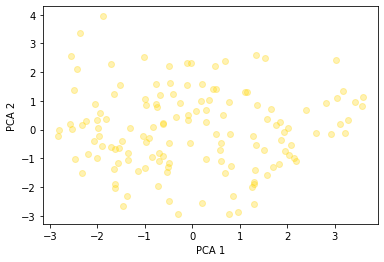

In [14]:
# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)
print(PCA_components)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()